# Regraph Viewer
### Load a regraph generated json file into networkx and view it

In [8]:
import json
import os
import sys
from pathlib import Path
import networkx as nx
from networkx.readwrite import json_graph

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def create_graph(json_file):
    with open(json_file) as file:
        json_data = json.load(file)
        G = json_graph.node_link_graph(json_data)
    return G

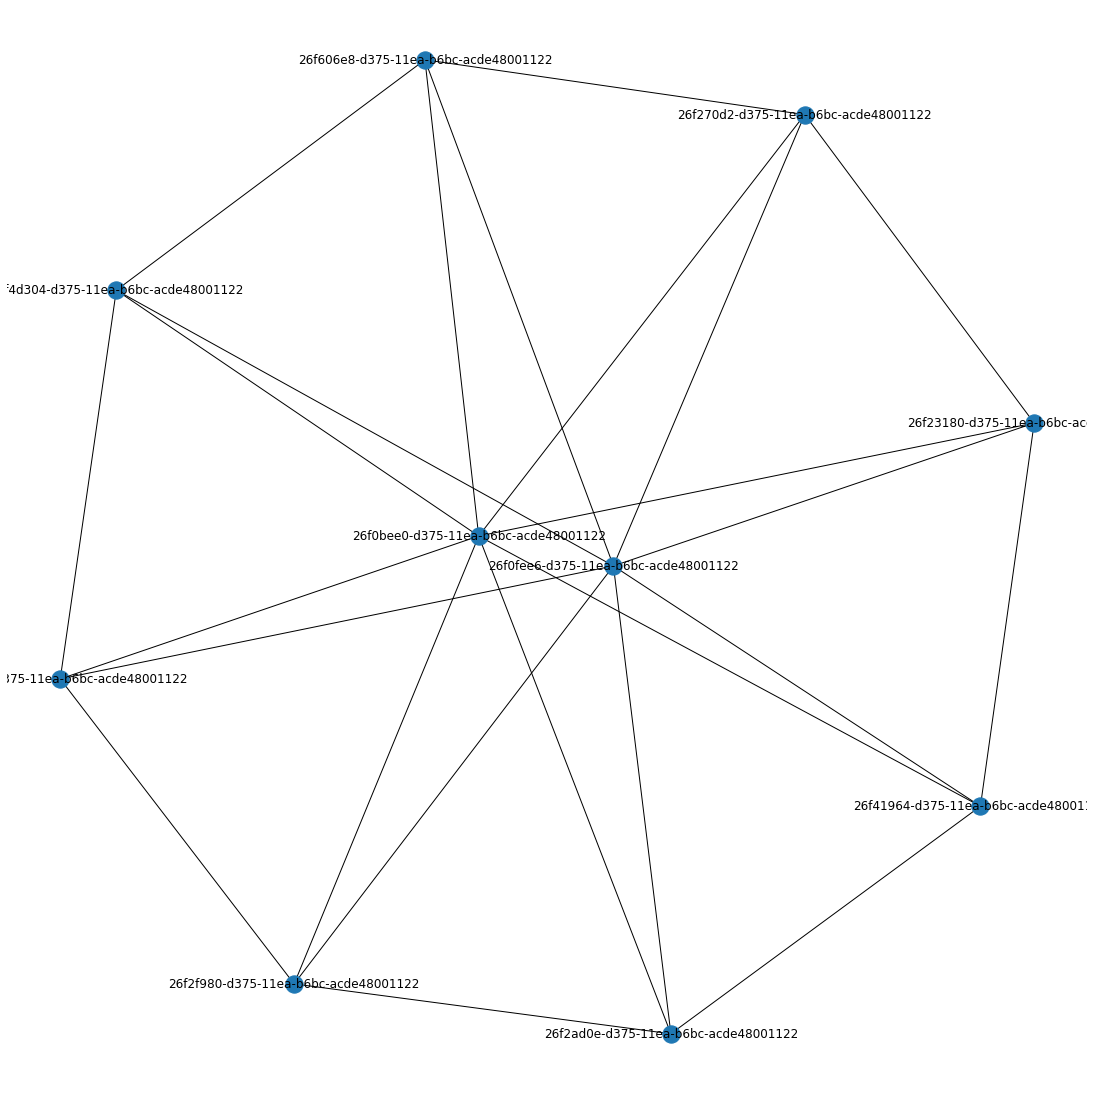

In [6]:
output_dir = Path() / "output"
regraph_file = output_dir / "Z0HexagonCutJoin_RootComponent_0000.json"
G = create_graph(regraph_file)
plt.figure(figsize=(15,15)) 
nx.draw(G, with_labels=True)

## Visualize Face Points

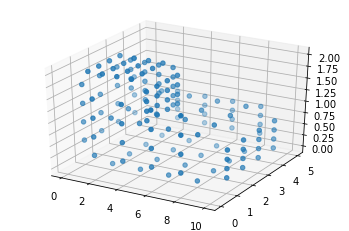

In [13]:
pt_json_file = output_dir / "Z0StepHighAtOrig_12e50ae9_0000_target.json"
with open(pt_json_file) as file:
    pt_data = json.load(file)

xs = []
ys = []
zs = []
for node in pt_data["nodes"]:
    pts = node["points"]
    pts_total = int(len(pts) / 3.0)
    for i in range(pts_total):
        xs.append(pts[i * 3])
        ys.append(pts[i * 3 + 1])
        zs.append(pts[i * 3 + 2])
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ax.scatter(xs, ys, zs)